In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
#https://www.kaggle.com/datasets/akshaydattatraykhare/car-details-dataset
file_path = '/content/CAR DETAILS FROM CAR DEKHO.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


# Define the target column and others as features
this wil allow us to use the target column for regression

In [ ]:
target_column = 'selling_price'
features = df.drop(columns=[target_column])
target = df[target_column]

In [ ]:
features = pd.get_dummies(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 565207433216.0000 - mae: 496978.0312 - val_loss: 668951117824.0000 - val_mae: 513254.0000
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 599800217600.0000 - mae: 514504.6562 - val_loss: 668778364928.0000 - val_mae: 513121.8750
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 585928671232.0000 - mae: 512644.6250 - val_loss: 668173795328.0000 - val_mae: 512678.2188
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 673396424704.0000 - mae: 520898.1250 - val_loss: 666899644416.0000 - val_mae: 511748.5625
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 577853259776.0000 - mae: 505251.2812 - val_loss: 664765661184.0000 - val_mae: 510187.7812
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 587435606016.0000 - mae: 506905.4375 - val_loss: 661553217536.0000 - val_mae: 507839.3125
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 544044122112.0000 - mae: 487230.4062 - val_loss: 65720

In [ ]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Absolute Error: {mae}")

Test Mean Absolute Error: 274594.625


In [ ]:
y_pred = model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


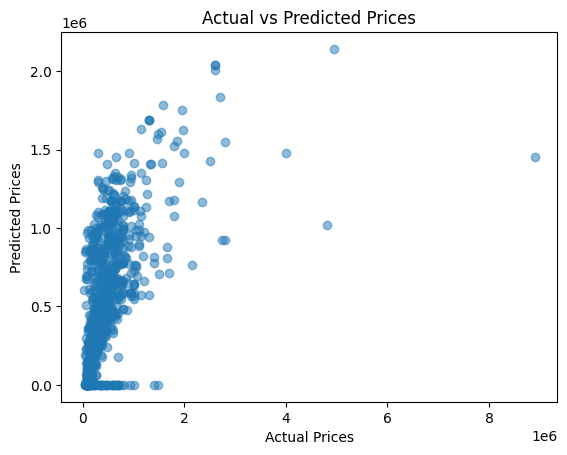

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# **CLASSIFICATION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
# Define target as 'fuel' and apply Label Encoding
target_column = 'fuel'
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

In [ ]:
# Prepare features and target
features = df.drop(columns=[target_column])
features = pd.get_dummies(features)  # Convert categorical features
target = to_categorical(df[target_column])  # One-hot encode target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(target.shape[1], activation='softmax')  # Multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6226 - loss: 0.9100 - val_accuracy: 0.8963 - val_loss: 0.3231
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9645 - loss: 0.1707 - val_accuracy: 0.9147 - val_loss: 0.2017
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9909 - loss: 0.0441 - val_accuracy: 0.9182 - val_loss: 0.1940
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9985 - loss: 0.0141 - val_accuracy: 0.9171 - val_loss: 0.1924
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9993 - loss: 0.0061 - val_accuracy: 0.9205 - val_loss: 0.1985
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9997 - loss: 0.0048 - val_accuracy: 0.9194 - val_loss: 0.2030
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9171 - val_loss: 0.2025
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9133 - loss: 0.2427
Test Accuracy: 0.92


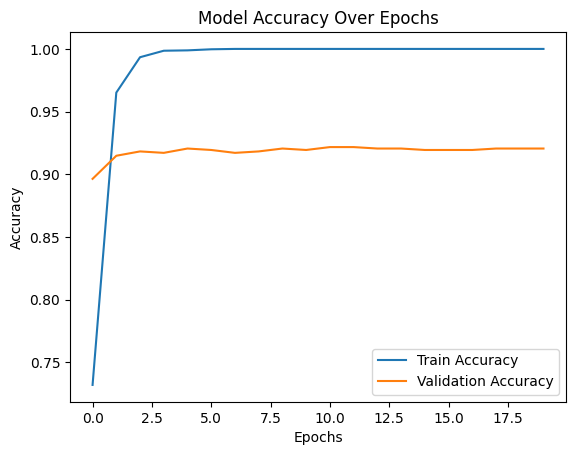

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()